In [1]:
%matplotlib notebook

from modsim import *

In [2]:
kg = UNITS.kilogram
m = UNITS.meter
s = UNITS.second
N = UNITS.newton
degree = UNITS.degree

In [3]:
#mass of person
mass = 62.1422

In [4]:
#constants
g = 9.81
k_trampoline = 200

In [5]:
#starting conditions
init = State(y = 0,
             v = 3)

In [6]:
duration = .30581039755351*2
ts = linrange (0, duration, .01)

In [7]:
system = System(init=init, g=g, ts=ts)

In [8]:
def slope_func(state, t, system):
    y, v = state
    unpack(system)
    
    dydt = v
    dvdt = -g
    
    return dydt, dvdt

In [9]:
slope_func(init, 0 , system)

(3, -9.81)

In [10]:
run_odeint(system, slope_func)

In [11]:
system.results.tail

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

In [12]:
def plot_position(results, x = ''):
    plot(results.y, label = x)
    legend = False
    decorate(xlabel = 'Time (s)',
             ylabel = 'Position (m)',
             legend = False)

<IPython.core.display.Javascript object>


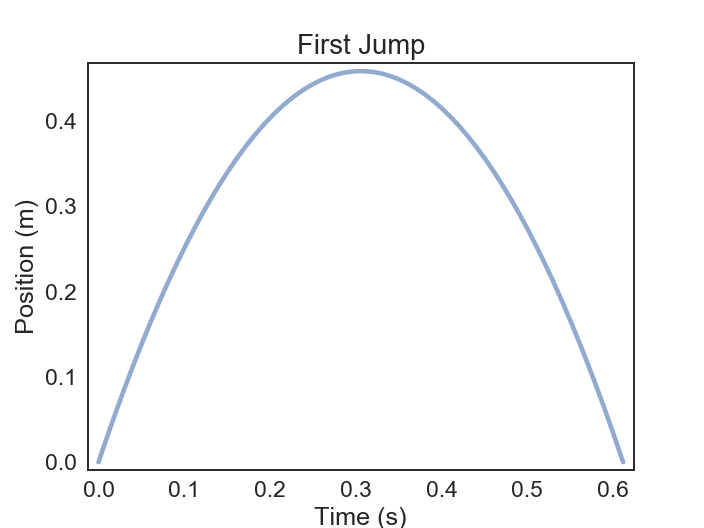

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [13]:
newfig()
plot_position(system.results)
decorate(title = 'First Jump')

In [14]:
d = 0.45859872611464

In [15]:
v_final_down = sqrt(2*g*d) #vertical velocity right before contact with trampoline
t = sqrt(2*d/g) #time to reach trampoline
p = mass * v_final_down #momentum at bottom
force_down = p/t #force applied to trampoline
tramp_displace = force_down / k_trampoline #trampoline displacement
tramp_PE = 0.5 * k_trampoline * tramp_displace**2 #elastic potential energy of trampoline

tramp_PE

929.07606569715108

In [16]:
k = 0

In [17]:
#legs
x = .2
leg_PE = 1/2 * k * x**2

In [18]:
Total_PE = tramp_PE + leg_PE

In [19]:
v_up = sqrt(2 * Total_PE / mass)

In [20]:
init_up = State(y = 0,
                v = v_up)

In [21]:
duration_up = v_up/g + duration

In [22]:
ts_up = linrange(duration, duration_up, .01)

In [23]:
system_up = System(init=init_up, g=g, ts=ts_up)

In [24]:
slope_func(init_up, 0, system_up)

(5.4682369066363616, -9.81)

In [25]:
run_odeint(system_up, slope_func)

In [26]:
print (system_up.results)

                 y             v
0.611621  0.000000  5.468237e+00
0.621575  0.053944  5.370590e+00
0.631528  0.106916  5.272943e+00
0.641482  0.158916  5.175296e+00
0.651436  0.209944  5.077649e+00
0.661390  0.260000  4.980001e+00
0.671344  0.309084  4.882354e+00
0.681298  0.357196  4.784707e+00
0.691251  0.404336  4.687060e+00
0.701205  0.450505  4.589413e+00
0.711159  0.495701  4.491766e+00
0.721113  0.539925  4.394119e+00
0.731067  0.583178  4.296472e+00
0.741021  0.625458  4.198825e+00
0.750974  0.666766  4.101178e+00
0.760928  0.707103  4.003531e+00
0.770882  0.746467  3.905884e+00
0.780836  0.784860  3.808236e+00
0.790790  0.822280  3.710589e+00
0.800744  0.858729  3.612942e+00
0.810697  0.894206  3.515295e+00
0.820651  0.928710  3.417648e+00
0.830605  0.962243  3.320001e+00
0.840559  0.994804  3.222354e+00
0.850513  1.026393  3.124707e+00
0.860467  1.057009  3.027060e+00
0.870420  1.086654  2.929413e+00
0.880374  1.115327  2.831766e+00
0.890328  1.143028  2.734118e+00
0.900282  

<IPython.core.display.Javascript object>


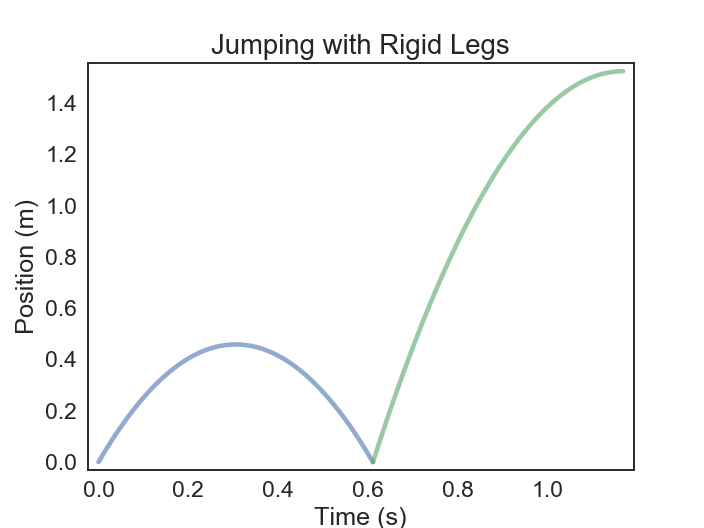

Saving figure to file no legs.pdf
Saving figure to file no legs.eps


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [62]:
newfig()
plot_position(system.results)
plot_position(system_up.results)
decorate(title = 'Jumping with Rigid Legs')
savefig('no legs.pdf')
savefig('no legs.eps')

In [28]:
k_values = linspace(.1, 100000, 21)

sweep = SweepSeries()

In [29]:
def plot_sweep():
    newfig()
    plot_position(system.results)
    for k in k_values:
        x = .2
        leg_PE = 1/2 * k * x**2
        Total_PE = tramp_PE + leg_PE
        v_up = sqrt(2 * Total_PE / mass)
        init_up = State(y = 0,
                        v = v_up)
        duration_up = v_up/g + duration
        ts_up = linrange(duration, duration_up, .01)
        system_up = System(init=init_up, g=g, ts=ts)
        slope_func(init_up, 0, system_up)
        run_odeint(system_up, slope_func)
        sweep[k] = system_up.results
        print(system.results.tail)
        plot_position(sweep[k], int(k))
    

<IPython.core.display.Javascript object>


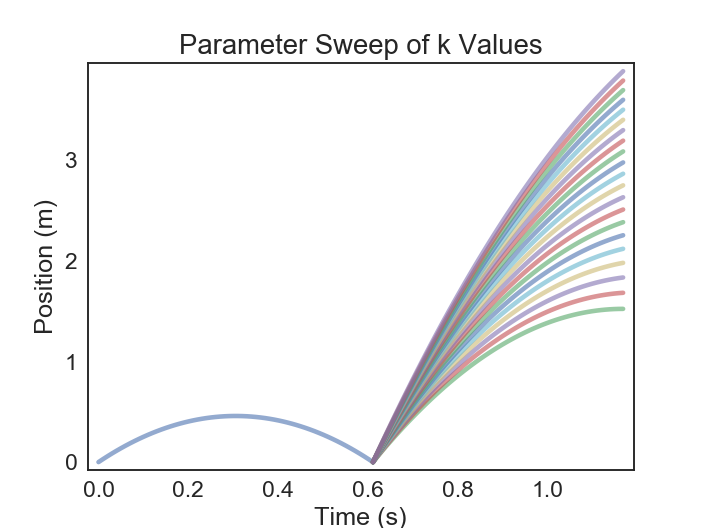

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

<bound method NDFrame.tail of                      y         v
0.000000  0.000000e+00  3.000000
0.010027  2.958660e-02  2.901639
0.020053  5.818698e-02  2.803279
0.030080  8.580114e-02  2.704918
0.040106  1.124291e-01  2.606557
0.050133  1.380708e-01  2.508197
0.060159  1.627263e-01  2.409836
0.070186  1.863956e-01  2.311475
0.080213  2.090786e-01  2.213115
0.090239  2.307755e-01  2.114754
0.100266  2.514861e-01  2.016393
0.110292  2.712105e-01  1.918033
0.120319  2.899487e-01  1.819672
0.130345  3.077007e-01  1.721311
0.140372  3.244664e-01  1.622951
0.150399  3.402459e-01  1.524590
0.160425  3.550392e-01  1.426230
0.170452  3.688463e-01  1.327869
0.180478  3.816672e-01  1.229508
0.190505  3.935018e-01  1.131148
0.200531  4.043502e-01  1.032787
0.210558  4.142124e-01  0.934426
0.220585  4.230884e-01  0.836066
0.230611  4.309782e-01  0.737705
0.240638  4.378817e-01  0.639344
0.250664  4.437990e-01  0.540984
0.260691  4.487301e-01  0.442623
0.270717  4.526750e-01  0.344262
0.280744  4.5

Saving figure to file Param Sweep.pdf
Saving figure to file Param Sweep.eps


In [63]:
plot_sweep()
decorate(title = 'Parameter Sweep of k Values', legend = False)
savefig('Param Sweep.pdf')
savefig('Param Sweep.eps')

In [31]:
k_values

array([  1.00000000e-01,   5.00009500e+03,   1.00000900e+04,
         1.50000850e+04,   2.00000800e+04,   2.50000750e+04,
         3.00000700e+04,   3.50000650e+04,   4.00000600e+04,
         4.50000550e+04,   5.00000500e+04,   5.50000450e+04,
         6.00000400e+04,   6.50000350e+04,   7.00000300e+04,
         7.50000250e+04,   8.00000200e+04,   8.50000150e+04,
         9.00000100e+04,   9.50000050e+04,   1.00000000e+05])

In [32]:
def run_simulation():
    final_height = TimeSeries()
    for k in k_values:
        x = 0.2
        leg_PE = 1/2 * k * x**2
        Total_PE = tramp_PE + leg_PE
        final_height[k] = Total_PE / (mass * g)  
    return final_height

In [33]:
final_height = run_simulation()
final_height

,value
0.100,1.524041
5000.095,1.688079
10000.090,1.852116
15000.085,2.016154
20000.080,2.180192
25000.075,2.344230
30000.070,2.508268
35000.065,2.672305
40000.060,2.836343
45000.055,3.000381


In [34]:
type (final_height)

modsim.TimeSeries

<IPython.core.display.Javascript object>


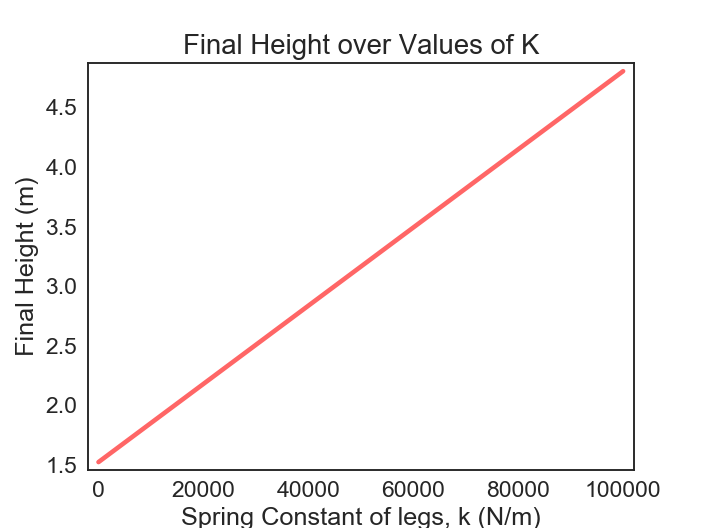

Saving figure to file Final Sweep.pdf
Saving figure to file Final Sweep.eps


C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [64]:
newfig()
plot(final_height, 'r-')
decorate(xlabel = 'Spring Constant of legs, k (N/m)',
         ylabel = 'Final Height (m)',
         title = 'Final Height over Values of K')
savefig('Final Sweep.pdf')
savefig('Final Sweep.eps')

In [47]:
K = interp_inverse(final_height, kind = 'linear')

In [48]:
double_height = K(3.048074)
double_height

array(46453.77554737585)

In [51]:
triple_height = K(1.524037*3)
triple_height

array(92907.56496349254)

In [57]:
H = interpolate(final_height, kind = 'linear')

In [61]:
natural_height = H(28500)
natural_height

array(2.4590538453944215)